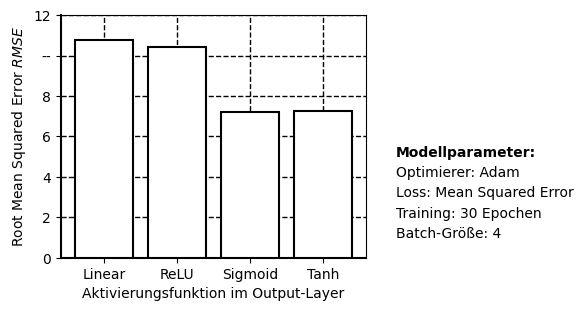

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

### Data
df = pd.read_csv('activation.csv')

df['output_activation'] = df['output_activation'].replace('linear', 'Linear')
df['output_activation'] = df['output_activation'].replace('sigmoid', 'Sigmoid')
df['output_activation'] = df['output_activation'].replace('tanh', 'Tanh')
df['output_activation'] = df['output_activation'].replace('softmax', 'Softmax')
df['output_activation'] = df['output_activation'].replace('<keras.src.layers.activation.relu.ReLU object at 0x7cc0706d24d0>', 'ReLU')

filtered = df
filtered = df.query("output_activation != 'Softmax'")


### Plot

fig = plt.figure(figsize=(10/2.54, 8/2.54))

plt.bar(filtered['output_activation'], filtered['root_mean_squared_error'], color='white', edgecolor='black', linewidth=1.5, zorder=3)
plt.ylabel('Root Mean Squared Error $RMSE$')
plt.xlabel('Aktivierungsfunktion im Output-Layer')
plt.grid(True, linestyle='--',color='k', linewidth=1, zorder=0)


# Axis settings
ax = plt.gca()
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.set_ylim(bottom=0, top=12)

# Einheiten auf y-Achse
yunit = '--'
ticks = ax.get_yticks()
ticks = [int(tick) for tick in ticks]
ticks_with_units = [yunit if i == len(ticks) - 2 else ticks[i] for i in range(len(ticks))]
ax.set_yticks(ticks)
ax.set_yticklabels(ticks_with_units)

plt.grid(True, linewidth=1.0)
x = 4
plt.text(x, 5, s='Modellparameter:', fontsize=10, fontweight='bold')
plt.text(x, 4, s='Optimierer: Adam', fontsize=10)
plt.text(x, 3, s='Loss: Mean Squared Error', fontsize=10)
plt.text(x, 2, s='Training: 30 Epochen', fontsize=10)
plt.text(x, 1, s='Batch-Größe: 4', fontsize=10)



plt.savefig('activation_selection.pdf', bbox_inches='tight', pad_inches=0.2, format='pdf')
plt.show()